In [1]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('train_X.pkl','rb') as f:
    train_X = pickle.load(f)
with open('train_y.pkl','rb') as f:
    train_y = pickle.load(f)
    
with open('cv_X.pkl','rb') as f:
    cv_X = pickle.load(f)
with open('cv_y.pkl','rb') as f:
    cv_y = pickle.load(f)

In [3]:
model = RandomForestRegressor(n_estimators=200, max_depth=50, max_samples=50, oob_score=True, random_state=1,
                                criterion='mse', n_jobs=-1)
model

RandomForestRegressor(max_depth=50, max_samples=50, n_estimators=200, n_jobs=-1,
                      oob_score=True, random_state=1)

# Feature Selection

In [4]:
column_index = []
column_dict = dict()
tr_fe_score,cv_fe_score = [], []

# Iterate till all columns
for j in tqdm.tqdm_notebook(range(train_X.shape[1])):
    max_cv_score = 1000 # Assign maximum value
    # Iterate over all columns
    for i in range(train_X.shape[1]):
        # select those which are not there in column_index
        if i not in column_index:
            # Fit the model with column
            model.fit(train_X[:,column_index + [i]],train_y)
            # Predict the train and cv
            tr_pred = model.predict(train_X[:,column_index + [i]])
            cv_pred = model.predict(cv_X[:,column_index + [i]])
            # score the error in train and cv
            tr_score = mean_squared_log_error(train_y,tr_pred)
            cv_score = mean_squared_log_error(cv_y,cv_pred)
            # If found improved one, then store the score and column index also
            if max_cv_score > cv_score:
                max_cv_score = cv_score
                current_column_index = i
    
    # Now update column index with best column index
    column_index = column_index + [current_column_index]
    # Fit, predict and score the train and cv with best column index
    model.fit(train_X[:,column_index],train_y)
    tr_pred = model.predict(train_X[:,column_index])
    cv_pred = model.predict(cv_X[:,column_index])
    tr_score = mean_squared_log_error(train_y,tr_pred)
    cv_score = mean_squared_log_error(cv_y,cv_pred)
    # Store the tr and cv score value into list so that we can plot the graph
    # between number of features and cv and train score
    tr_fe_score.append(tr_score)
    cv_fe_score.append(cv_score)
    # Store best column index as value and number of feature selected as key value
    column_dict[j+1] = column_index

<ipython-input-4-65f04be6dbb7>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm.tqdm_notebook(range(train_X.shape[1])):


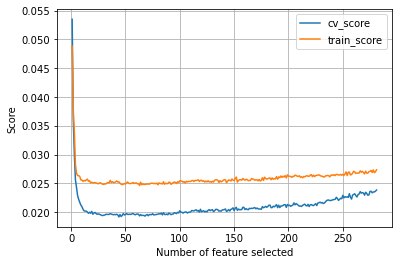

In [8]:
plt.plot(np.arange(1,train_X.shape[1]+1),cv_fe_score, label='cv_score')
plt.plot(np.arange(1,train_X.shape[1]+1),tr_fe_score, label='train_score')
plt.xlabel('Number of feature selected')
plt.ylabel('Score')
plt.grid()
plt.legend()
plt.show()

Observation: Somewhere around 50 to 100 we will find the best cv score among number of feature selected.

In [9]:
for i,s in enumerate(cv_fe_score[50:100]):
    print(i+50,s)

50 0.019756607416178375
51 0.01960603027539266
52 0.019605403681023884
53 0.01964243213212168
54 0.019597658430384454
55 0.01969742204908499
56 0.019766118417717044
57 0.01962681609192789
58 0.01953667238464372
59 0.019645810993795764
60 0.01967750497642196
61 0.019636807505408565
62 0.019348291178200843
63 0.019583093244165066
64 0.01942282223170136
65 0.01942563026117061
66 0.019442497429974746
67 0.01931094303130604
68 0.019502772759158526
69 0.019582478698676194
70 0.01936995837902235
71 0.019586575375909084
72 0.019574551791546834
73 0.01955413314699196
74 0.019733301570942715
75 0.01951767799018001
76 0.019544476649484173
77 0.019576951896921702
78 0.019610146383500452
79 0.01965330829083693
80 0.019725786526947994
81 0.01967129832260749
82 0.019836238286683464
83 0.019513170020238068
84 0.019893014984218825
85 0.019598198162776907
86 0.019578616836587067
87 0.019679097006178498
88 0.01953899520485067
89 0.01984545545501852
90 0.019715395046930016
91 0.019563883539200088
92 0.019

Observation: It's 67 as number of feature to selected.

Now let see which 67 features need to be selected among 281 columns

In [10]:
column_dict[67]

[82,
 232,
 178,
 198,
 168,
 134,
 7,
 163,
 202,
 146,
 207,
 231,
 234,
 101,
 140,
 81,
 118,
 190,
 244,
 158,
 48,
 36,
 4,
 227,
 23,
 279,
 208,
 252,
 204,
 53,
 223,
 176,
 87,
 258,
 170,
 201,
 160,
 219,
 17,
 166,
 161,
 121,
 50,
 25,
 185,
 110,
 18,
 180,
 152,
 257,
 55,
 37,
 24,
 19,
 175,
 143,
 251,
 229,
 255,
 47,
 205,
 237,
 5,
 171,
 221,
 186,
 3]

In [12]:
with open('column_fe_dict.pkl','wb') as f:
    pickle.dump(column_dict,f)

In [14]:
model.fit(train_X[:,column_dict[67]],train_y)

RandomForestRegressor(max_depth=50, max_samples=50, n_estimators=200, n_jobs=-1,
                      oob_score=True, random_state=1)

In [15]:
with open('rf_model_fe.pkl','wb') as f:
    pickle.dump(model,f)